# Palette Pie Chart

## Import libraries

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import math
import timeit
import zipfile

%matplotlib inline
import os

jpg_list = []

for dirname, _, filenames in os.walk(r'c:\Users\imoge\Downloads\anime_combined_images'):
    for filename in filenames:
        jpg_list.append(os.path.join(dirname, filename))

## Color pie charts

Some code taken from [Karan Bhanot](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

RGB to hex conversion

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Function to combine multiple images into a single image

In [9]:
import sys
from PIL import Image

def combine_images(img_list):

    images = [Image.open(x) for x in img_list]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    return new_im

Make 3D plot from the combined image that orders all the color values

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image
import mpl_toolkits.mplot3d.axes3d as p3


def make_3d_from_img(image_path):
    image = cv2.imread(image_path)
    modified_image = cv2.resize(image, (1400, 200), interpolation=cv2.INTER_AREA)
    
    b_channel,g_channel,r_channel = cv2.split(modified_image)

    channels = []
    
    for r_idx in range(0, len(r_channel)):
        for c_idx in range(0, len(r_channel[0])):
            index = (r_idx - 1) * len(r_channel[0]) + c_idx
            red = r_channel[r_idx][c_idx]
            green = g_channel[r_idx][c_idx]
            blue = b_channel[r_idx][c_idx]
            new_point = [red, green, blue]
            channels.append(new_point)
    
#     fig = plt.figure()
#     ax = p3.Axes3D(fig)
#     facecol = cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB).reshape(-1,3)/255.
#     ax.scatter(r_channel, g_channel, b_channel, marker='o', facecolors=facecol, s=1)
#     ax.set_xlabel("Red")
#     ax.set_ylabel("Green")
#     ax.set_zlabel("Blue")
#     plt.show()
    
    return channels

Clusters the 3D ordered plot using the kmeans algorithm (50 clusters)

In [29]:
from sklearn.cluster import DBSCAN
from matplotlib.colors import rgb2hex

def cluster_3d_colors(color_points):
    k_means = KMeans(n_clusters = 50)
    k_means.fit(color_points)
    pred = k_means.predict(color_points)
    
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     a = [channel[0] for channel in color_points]
#     b = [channel[1] for channel in color_points]
#     c = [channel[2] for channel in color_points]
#     labels = [k_means.cluster_centers_[cluster] for cluster in k_means.labels_]
#     ax.scatter(a, b, c, c=[label/255.0 for label in labels], s=1)
#     ax.view_init(azim=100)
#     plt.show()
    
    return k_means

Gets the color palette from a given image

In [33]:
import cv2
import sys
from PIL import Image
from itertools import groupby

def get_palette(img_name, model, number_of_colors):
    cluster_sizes = count_cluster_sizes(model)
    top_idx = cluster_sizes.argsort()[::-1][:number_of_colors]
    top_colors = [model.cluster_centers_[idx]/255. for idx in top_idx]
    values = [1] * number_of_colors

    img_name = img_name + '.png'
    
    plt.figure(figsize = (3, 3))
    plt.pie(values, colors = top_colors)
#     plt.show()
#     plt.savefig(img_name, transparent=True)

In [19]:
def count_cluster_sizes(model):
    
    cluster_sizes = [0] * len(model.cluster_centers_)
    for label in model.labels_:
        cluster_sizes[label] += 1
    return np.array(cluster_sizes)

# Run functions and get all the anime color palettes!

Total images: 193

Total time: About 2 hours

0
\Absurdist20Humour
1
\Action
2
\Adventure
3
\Africa
4
\Air20Force
5
\Alien
6
\All20Girls20School
7
\Alternative20Past
8
\Alternative20Present
9
\Americas
10
\Android
11
\Angel
12
\Angst
13
\Anthropomorphism
14
\Anti20War
15
\Asia
16
\Assassin
17
\Bakumatsu20Meiji20Period
18
\Baseball
19
\Basketball
20
\Battle20Royale


c:\users\imoge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


21
\Bishounen
22
\Blackmail
23
\Bounty20Hunter
24
\Boxing
25
\Breaking20The20Fourth20Wall
26
\Buddhism
27
\Card20Games
28
\China
29
\Combat
30
\Comedy
31
\Coming20Of20Age
32
\Conspiracy
33
\Contemporary20Fantasy
34
\Cooking
35
\Cops
36
\Countryside
37
\Crime
38
\Cross20Dressing
39
\Cyberpunk
40
\Cyborg
41
\Dark20Fantasy
42
\Deity
43
\Delinquent
44
\Dementia
45
\Demon
46
\Desert
47
\Detective
48
\Disaster
49
\Dragon
Time:  3780.138733999993


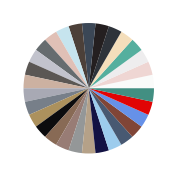

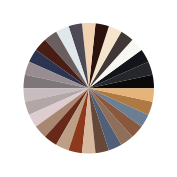

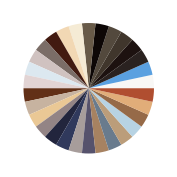

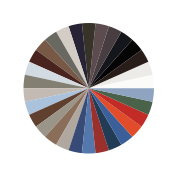

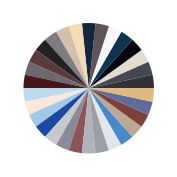

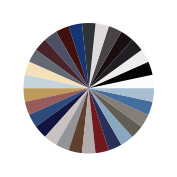

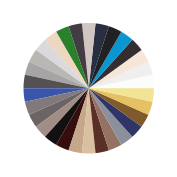

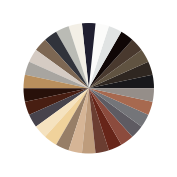

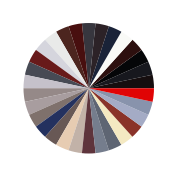

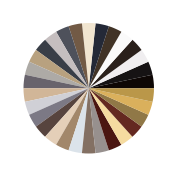

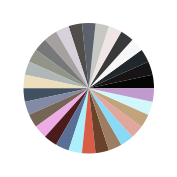

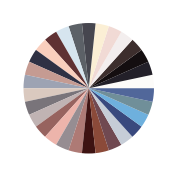

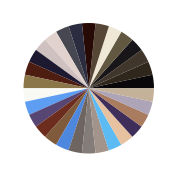

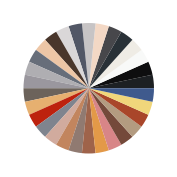

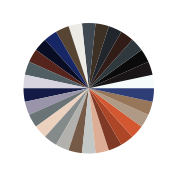

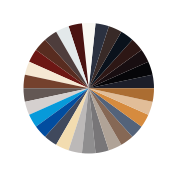

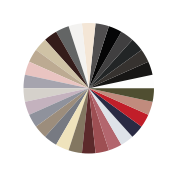

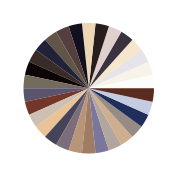

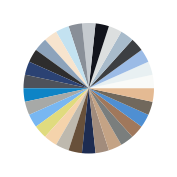

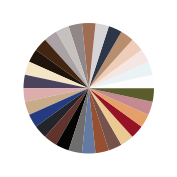

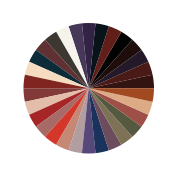

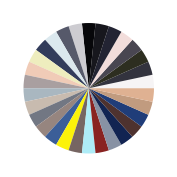

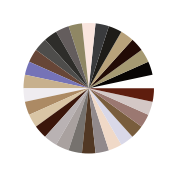

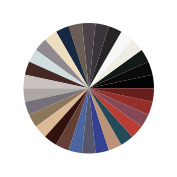

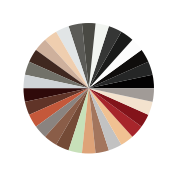

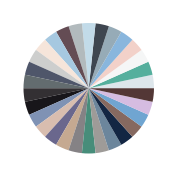

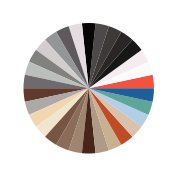

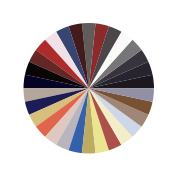

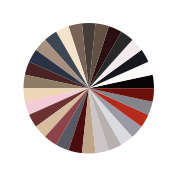

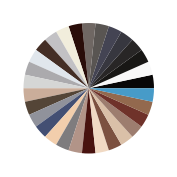

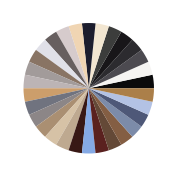

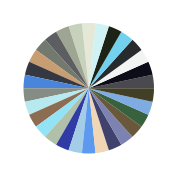

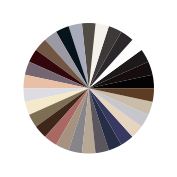

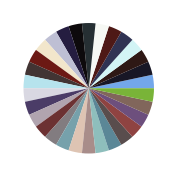

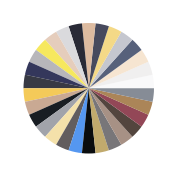

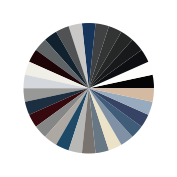

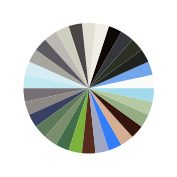

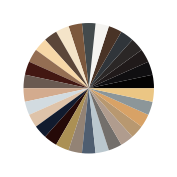

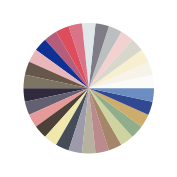

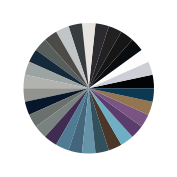

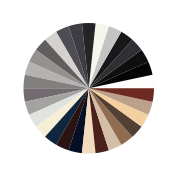

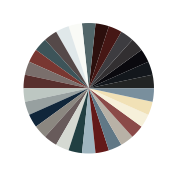

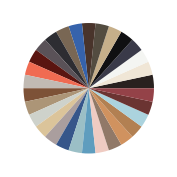

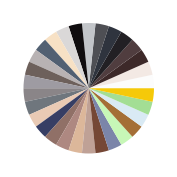

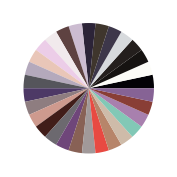

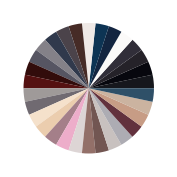

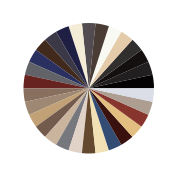

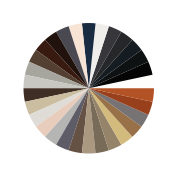

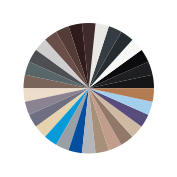

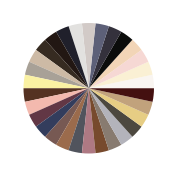

In [35]:
jpg_list.sort()

start = timeit.default_timer()
 
# Get the color palette for each category
for index in range(0, 50):
    image_path = jpg_list[index]
    name = image_path.split(r'c:\Users\imoge\Downloads\anime_combined_images\'')[1].split('.jpg')[0].replace('20', ' ')
    print(index, end=': ')
    print(name)
    channels = make_3d_from_img(image_path)
    model = cluster_3d_colors(channels)
    get_palette(name, model, 30)
    
stop = timeit.default_timer()
print('Time: ', stop - start) 